In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [4]:
#import Restaurant Reviews Dataset 
df=pd.read_table("C:\\Users\\DELL\\OneDrive\\Desktop\\ML\\Restaurant_Reviews.tsv")
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [6]:
df.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [7]:
df.columns

Index(['Review', 'Liked'], dtype='object')

In [8]:
df['Liked'].nunique()

2

In [9]:
print(df['Liked'].unique())

[1 0]


In [10]:
df['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

In [11]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


<AxesSubplot:xlabel='Liked', ylabel='count'>

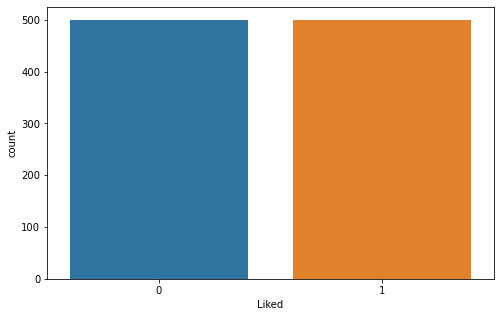

In [12]:
plt.figure(figsize=(8,5))
sns.countplot(x=df.Liked)

In [13]:
x=df['Review'].values
y=df['Liked'].values

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [15]:
x_train.shape

(750,)

In [16]:
x_test.shape

(250,)

In [17]:
y_train.shape

(750,)

In [18]:
y_test.shape

(250,)

In [20]:
vect=CountVectorizer(stop_words='english')
x_train_vect=vect.fit_transform(x_train)
x_test_vect=vect.transform(x_test)
model=SVC()

In [21]:
model.fit(x_train_vect,y_train)

SVC()

In [22]:
y_pred=model.predict(x_test_vect)
accuracy_score(y_pred,y_test)

0.72

In [23]:
text_model=make_pipeline(CountVectorizer(),SVC())
text_model.fit(x_train,y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()), ('svc', SVC())])

In [24]:
y_pred=text_model.predict(x_test)

In [25]:
y_pred

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0], dtype=int64)

In [26]:
accuracy_score(y_pred,y_test)

0.792

In [27]:
#Apllying Naive Bayes
classifier = MultinomialNB(alpha=0.1)
classifier.fit(x_train_vect, y_train)

# Predicting the Test set results
y_pred = classifier.predict(x_test_vect)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm)

score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("\n")
print("Accuracy is ",round(score1*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))

Confusion Matrix:
 [[ 81  36]
 [ 30 103]]


Accuracy is  73.6 %
Precision is  0.74
Recall is  0.77


In [28]:
text_model1=make_pipeline(CountVectorizer(),MultinomialNB())
text_model1.fit(x_train,y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [29]:
y_pred=text_model1.predict(x_test)
accuracy_score(y_pred,y_test)

0.784

In [30]:
joblib.dump(text_model,'Verzeo_Major_Project')

['Verzeo_Major_Project']

In [31]:
text_model.predict(['hello!!Love Your Food'])

array([1], dtype=int64)

In [32]:
text_model.predict(["omg!!it was too spice and i asked you don't add too much "])

array([0], dtype=int64)